In [22]:
%pip install decorator==5.0.9

import imp
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import networkx as nx

Note: you may need to restart the kernel to use updated packages.


In [23]:
# importing local modules

import sys
sys.path.append('../src/')

import text_cleanup.text_cleanup as thesisCleanUp
import preprocessing.text_preprocessing as thesisTextPreprocessing
import data.reader as thesisDataReader
import utils.utils as thesisUtils

imp.reload(thesisCleanUp)
imp.reload(thesisTextPreprocessing)
imp.reload(thesisDataReader)
imp.reload(thesisUtils)

<module 'utils.utils' from '../src/utils/utils.py'>

In [24]:
a_zwickau_text = thesisDataReader.read_a_zwickau()
b_london_text = thesisDataReader.read_b_london()

In [25]:
a_zwickau_corpus = thesisCleanUp.create_corpus_by_line(thesisCleanUp.jvtext(a_zwickau_text))
b_london_corpus = thesisCleanUp.create_corpus_by_line(thesisCleanUp.jvtext(b_london_text))

In [26]:
def get_features(corpus):
    count_vectorizer = CountVectorizer()
    sparse_matrix = count_vectorizer.fit_transform(corpus)
    doc_term_matrix = sparse_matrix.todense()
    df = pd.DataFrame(doc_term_matrix, columns=count_vectorizer.get_feature_names())
    return df


In [27]:
a_zwickau_df = get_features(a_zwickau_corpus)
a_zwickau_similarities = cosine_similarity(a_zwickau_df, a_zwickau_df)

b_london_df = get_features(b_london_corpus)
b_london_similarities = cosine_similarity(b_london_df, b_london_df)

In [28]:
def show_similarities_data(similarities):
    for index, value in enumerate(similarities):
        max_indices = thesisUtils.get_n_indexes_of_max_values(value, 6)
        print('___ max similariry for paragraph: {} ___'.format(index))
        for i in max_indices:
            print('index: [{}] value: {}'.format(i, similarities[index][i]))
        print('average: {}'.format(np.average(value)))

        unique, counts = np.unique(value, return_counts=True)
        unique_dictionary = dict(zip(unique, counts))
        print('0 similarities: {}'.format(unique_dictionary.get(0.0)))

        print()

In [29]:
show_similarities_data(a_zwickau_similarities)

___ max similariry for paragraph: 0 ___
index: [147] value: 0.08489527199560178
index: [79] value: 0.09325048082403138
index: [19] value: 0.13093073414159542
index: [49] value: 0.14907119849998596
index: [321] value: 0.2981423969999719
index: [0] value: 0.9999999999999999
average: 0.010523573386299726
0 similarities: 277

___ max similariry for paragraph: 1 ___
index: [283] value: 0.5207785898979804
index: [288] value: 0.5210797334966377
index: [42] value: 0.5221787059499383
index: [280] value: 0.5426208331435108
index: [289] value: 0.5659670877347581
index: [1] value: 1.0000000000000002
average: 0.27136194652898976
0 similarities: 4

___ max similariry for paragraph: 2 ___
index: [10] value: 0.33892841149279485
index: [297] value: 0.3436288414836225
index: [184] value: 0.34538959804401387
index: [123] value: 0.35689512920876265
index: [182] value: 0.37203955419831947
index: [2] value: 0.9999999999999997
average: 0.19290583474147313
0 similarities: 5

___ max similariry for paragraph: 

0 similarities: 2

___ max similariry for paragraph: 211 ___
index: [201] value: 0.5322650914479395
index: [297] value: 0.5530684173876804
index: [169] value: 0.5610765942731873
index: [64] value: 0.5636452794553989
index: [70] value: 0.5717473459704991
index: [211] value: 1.0000000000000002
average: 0.3432198041539042
0 similarities: 1

___ max similariry for paragraph: 212 ___
index: [182] value: 0.3896680269807997
index: [121] value: 0.3901794323484754
index: [88] value: 0.3907204023704541
index: [123] value: 0.3921465945863517
index: [184] value: 0.43543327031339285
index: [212] value: 1.0000000000000002
average: 0.22867600837879776
0 similarities: 3

___ max similariry for paragraph: 213 ___
index: [280] value: 0.371616661058901
index: [299] value: 0.374585125915641
index: [36] value: 0.3825066461107147
index: [318] value: 0.3880739346707538
index: [301] value: 0.4200642294398238
index: [213] value: 1.0000000000000002
average: 0.23123622816097053
0 similarities: 3

___ max similar

In [30]:
show_similarities_data(b_london_similarities)

___ max similariry for paragraph: 0 ___
index: [216] value: 0.22473328748774737
index: [46] value: 0.23438349412361906
index: [214] value: 0.23717082451262841
index: [161] value: 0.3078745359035396
index: [19] value: 0.31622776601683794
index: [0] value: 0.9999999999999999
average: 0.07355272703048302
0 similarities: 71

___ max similariry for paragraph: 1 ___
index: [280] value: 0.5186140765681567
index: [275] value: 0.5286068316639049
index: [272] value: 0.5388068630414614
index: [313] value: 0.5523841101337049
index: [281] value: 0.5570002760135979
index: [1] value: 1.0
average: 0.2913087040852929
0 similarities: None

___ max similariry for paragraph: 2 ___
index: [174] value: 0.38851798041316415
index: [118] value: 0.3906816887604908
index: [205] value: 0.3929341334137072
index: [37] value: 0.4000988020269483
index: [289] value: 0.4074753667262725
index: [2] value: 0.9999999999999997
average: 0.23710042511207313
0 similarities: 1

___ max similariry for paragraph: 3 ___
index: [28

index: [98] value: 0.9999999999999998
average: 0.39534256554544767
0 similarities: None

___ max similariry for paragraph: 99 ___
index: [94] value: 0.38101833747060704
index: [235] value: 0.3863097476970663
index: [96] value: 0.3902439024390244
index: [92] value: 0.40801812047580177
index: [98] value: 0.44893459761245724
index: [99] value: 1.0000000000000004
average: 0.24818676894136688
0 similarities: None

___ max similariry for paragraph: 100 ___
index: [59] value: 0.6168966643731657
index: [275] value: 0.6175566624277548
index: [295] value: 0.6272639335852986
index: [313] value: 0.6275790992218752
index: [289] value: 0.6403656250211447
index: [100] value: 0.9999999999999999
average: 0.39963245927533786
0 similarities: None

___ max similariry for paragraph: 101 ___
index: [152] value: 0.3843711067980367
index: [134] value: 0.38981938376529196
index: [235] value: 0.409425183871612
index: [102] value: 0.4220017209131776
index: [98] value: 0.42425258154974904
index: [101] value: 0.99

0 similarities: None

___ max similariry for paragraph: 204 ___
index: [42] value: 0.5345342056806156
index: [280] value: 0.5404429749950186
index: [197] value: 0.5438858668096885
index: [273] value: 0.5545763871796547
index: [313] value: 0.5587387938191256
index: [204] value: 1.0000000000000002
average: 0.30897368320949964
0 similarities: 1

___ max similariry for paragraph: 205 ___
index: [291] value: 0.6349531655972014
index: [92] value: 0.6359816496005753
index: [117] value: 0.646079240403006
index: [295] value: 0.6577691317537865
index: [289] value: 0.6761315502290253
index: [205] value: 1.0
average: 0.4127696841644655
0 similarities: 1

___ max similariry for paragraph: 206 ___
index: [94] value: 0.24305086711954235
index: [91] value: 0.2502172968684897
index: [205] value: 0.2572974025736376
index: [22] value: 0.2948839123097942
index: [230] value: 0.3138745217132938
index: [206] value: 0.9999999999999998
average: 0.13544193831865867
0 similarities: 1

___ max similariry for para

index: [92] value: 0.46722506354273047
index: [305] value: 0.4829044501000699
index: [313] value: 0.48312744167132815
index: [291] value: 0.4950804181529275
index: [289] value: 0.5305738232591316
index: [309] value: 1.0000000000000002
average: 0.30234260719082384
0 similarities: None

___ max similariry for paragraph: 310 ___
index: [291] value: 0.6806464948280623
index: [313] value: 0.6828053156809787
index: [148] value: 0.6923083454487985
index: [295] value: 0.6990351404756346
index: [289] value: 0.7142507910537715
index: [310] value: 0.9999999999999999
average: 0.434426313713378
0 similarities: None

___ max similariry for paragraph: 311 ___
index: [291] value: 0.49917860641731787
index: [295] value: 0.5045551601914047
index: [305] value: 0.5218315662126569
index: [313] value: 0.5238369361927129
index: [289] value: 0.5734838950015179
index: [311] value: 1.0
average: 0.31981567432278774
0 similarities: None

___ max similariry for paragraph: 312 ___
index: [305] value: 0.335756409789

Observation that paragraph 6 in both version in top 5 have paragraph 5, although with different values, but it is among top 5.

Need to pay attention that paragraph in version 1 can be completely different in version 2 - create similarity between versions

In [31]:
def get_max_similarity_per_p(similarities):
    res = []
    for index, value in enumerate(similarities):
        max_indices = thesisUtils.get_n_indexes_of_max_values(value, 6)
        max_indices_without_self = max_indices[:-1]
        max_similarity = value[max_indices_without_self[-1]]
        res.append(max_similarity)
    return res

In [32]:
a_zwickau_max_similarity_per_p = get_max_similarity_per_p(a_zwickau_similarities)
b_london_max_similarity_per_p = get_max_similarity_per_p(b_london_similarities)


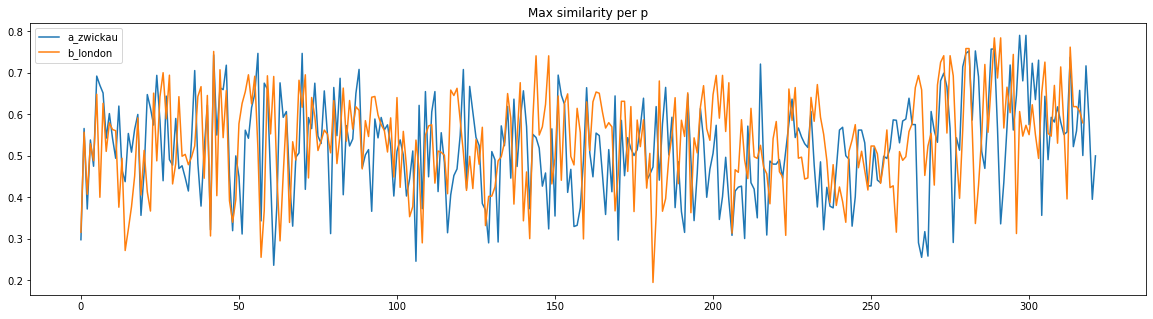

In [33]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(a_zwickau_max_similarity_per_p, label="a_zwickau")
ax.plot(b_london_max_similarity_per_p, label="b_london")
ax.legend()
plt.title('Max similarity per p')
plt.show()

In [34]:
def cross_version_similarity(version_1_corpus, version_2_corpus):
    res = []
    for i, p in enumerate(version_1_corpus):
        temp_corpus = [p] + version_2_corpus
        df_features = get_features(temp_corpus)
        temp_similarities = cosine_similarity(df_features, df_features)
        res.append(temp_similarities[0])
    return res

In [35]:
a_zwickau_b_london_similarities = cross_version_similarity(a_zwickau_corpus, b_london_corpus)
b_london_a_zwickau_similarities = cross_version_similarity(b_london_corpus, a_zwickau_corpus)

In [36]:
show_similarities_data(a_zwickau_b_london_similarities)

___ max similariry for paragraph: 0 ___
index: [12] value: 0.08567058737562386
index: [160] value: 0.1025978352085154
index: [9] value: 0.10811249552346706
index: [308] value: 0.10947611030079467
index: [20] value: 0.21081851067789198
index: [0] value: 0.9999999999999999
average: 0.010492193914265511
0 similarities: 270

___ max similariry for paragraph: 1 ___
index: [281] value: 0.5265488284699746
index: [273] value: 0.5399504387011153
index: [314] value: 0.5451380586625393
index: [282] value: 0.5623233939963108
index: [2] value: 0.8902455065849022
index: [0] value: 1.0000000000000007
average: 0.2837866476302864
0 similarities: None

___ max similariry for paragraph: 2 ___
index: [175] value: 0.3500423463936537
index: [155] value: 0.35038344169883956
index: [206] value: 0.3513564844273336
index: [38] value: 0.3669364471420551
index: [3] value: 0.9379580992210835
index: [0] value: 0.9999999999999997
average: 0.20327481617767368
0 similarities: 1

___ max similariry for paragraph: 3 ___

0 similarities: 13

___ max similariry for paragraph: 203 ___
index: [251] value: 0.37532594530273466
index: [228] value: 0.39593773131515986
index: [95] value: 0.3987219658473174
index: [213] value: 0.4355724051843767
index: [212] value: 0.6091095901015049
index: [0] value: 1.0000000000000002
average: 0.19815382489709168
0 similarities: 3

___ max similariry for paragraph: 204 ___
index: [296] value: 0.4803409936088642
index: [47] value: 0.4831155725081722
index: [290] value: 0.4891671804783885
index: [173] value: 0.49236710095683767
index: [213] value: 0.746351792533165
index: [0] value: 0.9999999999999999
average: 0.30804841467599914
0 similarities: None

___ max similariry for paragraph: 205 ___
index: [292] value: 0.34572332579188875
index: [260] value: 0.3668705402807886
index: [54] value: 0.381956468779879
index: [50] value: 0.39204615768212886
index: [211] value: 0.4320138246635874
index: [0] value: 1.0000000000000002
average: 0.214035811006859
0 similarities: 1

___ max simila

In [37]:
show_similarities_data(b_london_a_zwickau_similarities)

___ max similariry for paragraph: 0 ___
index: [58] value: 0.22360679774997896
index: [29] value: 0.2429328990536748
index: [91] value: 0.26967994498529685
index: [168] value: 0.3071475584169756
index: [219] value: 0.3450327796711771
index: [0] value: 0.9999999999999999
average: 0.06943010033728667
0 similarities: 88

___ max similariry for paragraph: 1 ___
index: [43] value: 0.5268140465549274
index: [284] value: 0.5316562815624934
index: [281] value: 0.5409898532368471
index: [290] value: 0.5601742216741843
index: [2] value: 0.8902455065849022
index: [0] value: 1.0
average: 0.28121229328678193
0 similarities: 4

___ max similariry for paragraph: 2 ___
index: [314] value: 0.38455746790429207
index: [124] value: 0.4044499010486059
index: [183] value: 0.40618119722996154
index: [298] value: 0.4087469906534114
index: [3] value: 0.9379580992210835
index: [0] value: 0.9999999999999997
average: 0.2299061781760085
0 similarities: 5

___ max similariry for paragraph: 3 ___
index: [170] value:

index: [0] value: 1.0000000000000002
average: 0.3701139516776271
0 similarities: 1

___ max similariry for paragraph: 86 ___
index: [60] value: 0.5365324891469913
index: [124] value: 0.5375534543909587
index: [298] value: 0.5642182111710887
index: [314] value: 0.5689305426952577
index: [94] value: 0.7573172464461017
index: [0] value: 0.9999999999999996
average: 0.3201731441929687
0 similarities: 1

___ max similariry for paragraph: 87 ___
index: [274] value: 0.5757256541782473
index: [300] value: 0.5881392479852696
index: [282] value: 0.589214290419153
index: [89] value: 0.5950641929158392
index: [95] value: 0.7440453767382595
index: [0] value: 1.0
average: 0.33916135457243884
0 similarities: 2

___ max similariry for paragraph: 88 ___
index: [47] value: 0.5665781457465504
index: [37] value: 0.5666858398330223
index: [153] value: 0.5724532318912199
index: [298] value: 0.6136867003577338
index: [96] value: 0.8784581218541094
index: [0] value: 1.0000000000000002
average: 0.34212537992844

0 similarities: 1

___ max similariry for paragraph: 191 ___
index: [183] value: 0.5228006187764896
index: [300] value: 0.5325944394715552
index: [298] value: 0.5331188857885178
index: [170] value: 0.5736426961095629
index: [201] value: 0.8784827910993228
index: [0] value: 1.0
average: 0.3401436920606613
0 similarities: 1

___ max similariry for paragraph: 192 ___
index: [122] value: 0.6322988303269336
index: [89] value: 0.6442902255814421
index: [298] value: 0.6449994040114085
index: [300] value: 0.6541971470771106
index: [202] value: 0.6567361984298967
index: [0] value: 0.9999999999999998
average: 0.3995306179060198
0 similarities: 1

___ max similariry for paragraph: 193 ___
index: [173] value: 0.2787182624220892
index: [317] value: 0.2801845641776715
index: [170] value: 0.2846287278902472
index: [176] value: 0.31278230853353534
index: [171] value: 0.8929456924498124
index: [0] value: 1.0000000000000004
average: 0.14850927762687113
0 similarities: None

___ max similariry for paragr

___ max similariry for paragraph: 296 ___
index: [314] value: 0.2919649365094874
index: [153] value: 0.3077755574358042
index: [178] value: 0.3173531918581385
index: [183] value: 0.3251420733360883
index: [305] value: 0.9170840819695139
index: [0] value: 0.9999999999999999
average: 0.1729630026174143
0 similarities: 2

___ max similariry for paragraph: 297 ___
index: [302] value: 0.5735548632292421
index: [281] value: 0.587533800101187
index: [282] value: 0.5965012785226675
index: [284] value: 0.6074742997797227
index: [306] value: 0.9419635761646005
index: [0] value: 0.9999999999999999
average: 0.3275993599363282
0 similarities: 1

___ max similariry for paragraph: 298 ___
index: [314] value: 0.5104271314205518
index: [37] value: 0.5133382593870183
index: [304] value: 0.5145184737317282
index: [298] value: 0.5273360925955504
index: [307] value: 0.934022185938865
index: [0] value: 1.0000000000000007
average: 0.30016842741859645
0 similarities: 3

___ max similariry for paragraph: 299 _

Observation that that most paragraph in a_zwickau version are similar to they corresponding paragraph in b_london (remember that we added a new paragraph, so if p 1 similart to 2 - the meaning that 1 similart to 1, cause of a p added to b_london)

After p 20 it seems that correspondences switches, meaning that p 25 a_zwickau similar to p 27 b_london

And aligns back at p 40

At p 50 similarity switches to 50 -> 48, before it we had x -> x+2, not x -> x-2

At p 78 they even not close to any surronded paragraphs

In [38]:
a_zwickau_b_london_max_similarity_per_p = get_max_similarity_per_p(a_zwickau_b_london_similarities)
b_london_a_zwickau_max_similarity_per_p = get_max_similarity_per_p(b_london_a_zwickau_similarities)

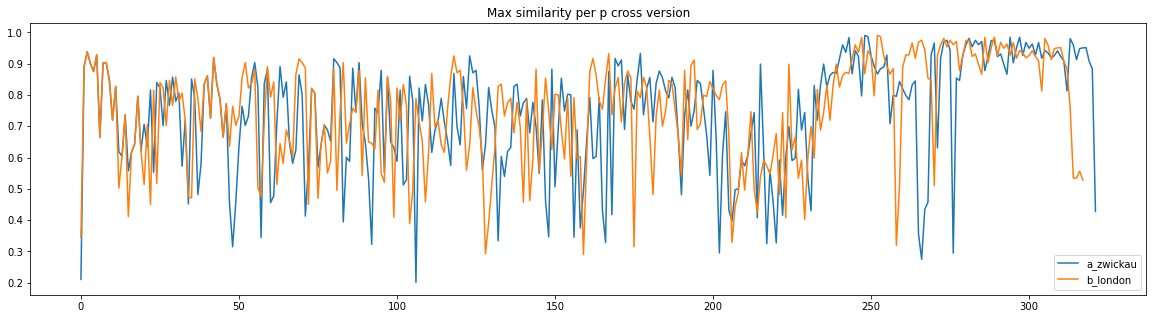

In [39]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(a_zwickau_b_london_max_similarity_per_p, label="a_zwickau")
ax.plot(b_london_a_zwickau_max_similarity_per_p, label="b_london")
ax.legend()
plt.title('Max similarity per p cross version')
plt.show()

In [40]:
def create_G_of_similaritis(similarities):
    G = nx.Graph()
    for index, value in enumerate(similarities):
        max_indices = thesisUtils.get_n_indexes_of_max_values(value, 6)
        max_indices_without_self = max_indices[:-1]
        G.add_node(index) # node himself
        for n in max_indices_without_self:
            G.add_node(n)
            weight = similarities[index][n]
            G.add_weighted_edges_from([(index, n, weight)])
    return G

In [41]:
def show_G(G):
    %matplotlib notebook

    fig = plt.figure(figsize=(10, 10))
    fig.canvas.manager.full_screen_toggle()

    pos=nx.spring_layout(G)
    nx.draw(
        G, 
        pos,
        with_labels=True, 
    )
    fig.show()

In [42]:
a_zwickau_G = create_G_of_similaritis(a_zwickau_similarities)
b_london_G = create_G_of_similaritis(b_london_similarities)

In [44]:
print(len(list(nx.connected_components(a_zwickau_G))))
print(len(list(nx.connected_components(b_london_G))))

1
1


In [45]:
a_zwickau_sorted_degree = sorted(a_zwickau_G.degree, key=lambda x: x[1], reverse=True)
print(a_zwickau_sorted_degree)
# it seems that all nodes that have degree of 5 might be not relevant since they are similar to something, 
# but nobody similar to them

[(297, 150), (299, 104), (281, 68), (303, 67), (121, 60), (280, 49), (313, 45), (42, 44), (88, 42), (70, 42), (283, 40), (318, 37), (169, 29), (288, 25), (36, 25), (289, 24), (63, 24), (182, 23), (123, 18), (81, 18), (301, 18), (152, 17), (167, 17), (74, 17), (201, 16), (91, 16), (211, 16), (101, 16), (73, 15), (21, 14), (72, 14), (76, 14), (273, 14), (46, 14), (58, 14), (64, 14), (56, 13), (192, 13), (77, 13), (184, 12), (59, 12), (78, 12), (251, 12), (137, 12), (98, 12), (149, 11), (87, 11), (134, 11), (30, 11), (105, 11), (219, 11), (90, 11), (236, 11), (279, 11), (10, 10), (9, 10), (44, 10), (24, 10), (54, 10), (82, 10), (68, 10), (143, 10), (16, 9), (18, 9), (185, 9), (136, 9), (298, 9), (32, 9), (35, 9), (40, 9), (248, 9), (254, 9), (140, 9), (225, 9), (253, 9), (221, 9), (173, 9), (257, 9), (243, 9), (224, 9), (15, 8), (23, 8), (139, 8), (25, 8), (309, 8), (45, 8), (240, 8), (124, 8), (111, 8), (86, 8), (114, 8), (164, 8), (270, 8), (274, 8), (255, 8), (175, 8), (258, 8), (260, 

In [46]:
# try to check with union and interssction of different G ( |, &, ^)
b_london_sorted_degree = sorted(b_london_G.degree, key=lambda x: x[1], reverse=True)
print(b_london_sorted_degree)

[(289, 143), (313, 100), (291, 81), (295, 63), (92, 52), (273, 52), (148, 43), (205, 40), (305, 34), (42, 34), (310, 32), (280, 31), (275, 30), (192, 26), (272, 24), (53, 24), (157, 23), (161, 21), (281, 21), (37, 21), (59, 21), (73, 20), (144, 19), (98, 19), (197, 19), (94, 19), (80, 18), (102, 17), (233, 17), (212, 17), (31, 16), (293, 15), (70, 14), (154, 14), (71, 14), (317, 14), (231, 14), (134, 14), (26, 13), (265, 13), (85, 13), (51, 13), (100, 13), (96, 13), (55, 12), (9, 12), (83, 12), (162, 12), (255, 12), (46, 11), (174, 11), (118, 11), (183, 11), (69, 11), (153, 11), (65, 11), (188, 11), (147, 10), (18, 10), (54, 10), (36, 10), (97, 10), (200, 10), (74, 10), (235, 10), (91, 10), (172, 10), (151, 10), (82, 9), (152, 9), (117, 9), (160, 9), (209, 9), (247, 9), (228, 9), (227, 9), (61, 9), (119, 9), (138, 9), (301, 9), (264, 9), (216, 8), (165, 8), (44, 8), (219, 8), (103, 8), (215, 8), (25, 8), (263, 8), (120, 8), (135, 8), (240, 8), (121, 8), (130, 8), (217, 8), (225, 8), (2

In [47]:
a_zwickau_strongly_connected_nodes = [(node, degree) for node, degree in a_zwickau_sorted_degree if degree >= 10]
print(len(a_zwickau_strongly_connected_nodes))
print(a_zwickau_strongly_connected_nodes)

62
[(297, 150), (299, 104), (281, 68), (303, 67), (121, 60), (280, 49), (313, 45), (42, 44), (88, 42), (70, 42), (283, 40), (318, 37), (169, 29), (288, 25), (36, 25), (289, 24), (63, 24), (182, 23), (123, 18), (81, 18), (301, 18), (152, 17), (167, 17), (74, 17), (201, 16), (91, 16), (211, 16), (101, 16), (73, 15), (21, 14), (72, 14), (76, 14), (273, 14), (46, 14), (58, 14), (64, 14), (56, 13), (192, 13), (77, 13), (184, 12), (59, 12), (78, 12), (251, 12), (137, 12), (98, 12), (149, 11), (87, 11), (134, 11), (30, 11), (105, 11), (219, 11), (90, 11), (236, 11), (279, 11), (10, 10), (9, 10), (44, 10), (24, 10), (54, 10), (82, 10), (68, 10), (143, 10)]


In [48]:
b_london_strongly_connected_nodes = [(node, degree) for node, degree in b_london_sorted_degree if degree >= 10]
print(len(b_london_strongly_connected_nodes))
print(b_london_strongly_connected_nodes)

68
[(289, 143), (313, 100), (291, 81), (295, 63), (92, 52), (273, 52), (148, 43), (205, 40), (305, 34), (42, 34), (310, 32), (280, 31), (275, 30), (192, 26), (272, 24), (53, 24), (157, 23), (161, 21), (281, 21), (37, 21), (59, 21), (73, 20), (144, 19), (98, 19), (197, 19), (94, 19), (80, 18), (102, 17), (233, 17), (212, 17), (31, 16), (293, 15), (70, 14), (154, 14), (71, 14), (317, 14), (231, 14), (134, 14), (26, 13), (265, 13), (85, 13), (51, 13), (100, 13), (96, 13), (55, 12), (9, 12), (83, 12), (162, 12), (255, 12), (46, 11), (174, 11), (118, 11), (183, 11), (69, 11), (153, 11), (65, 11), (188, 11), (147, 10), (18, 10), (54, 10), (36, 10), (97, 10), (200, 10), (74, 10), (235, 10), (91, 10), (172, 10), (151, 10)]


<IPython.core.display.Javascript object>


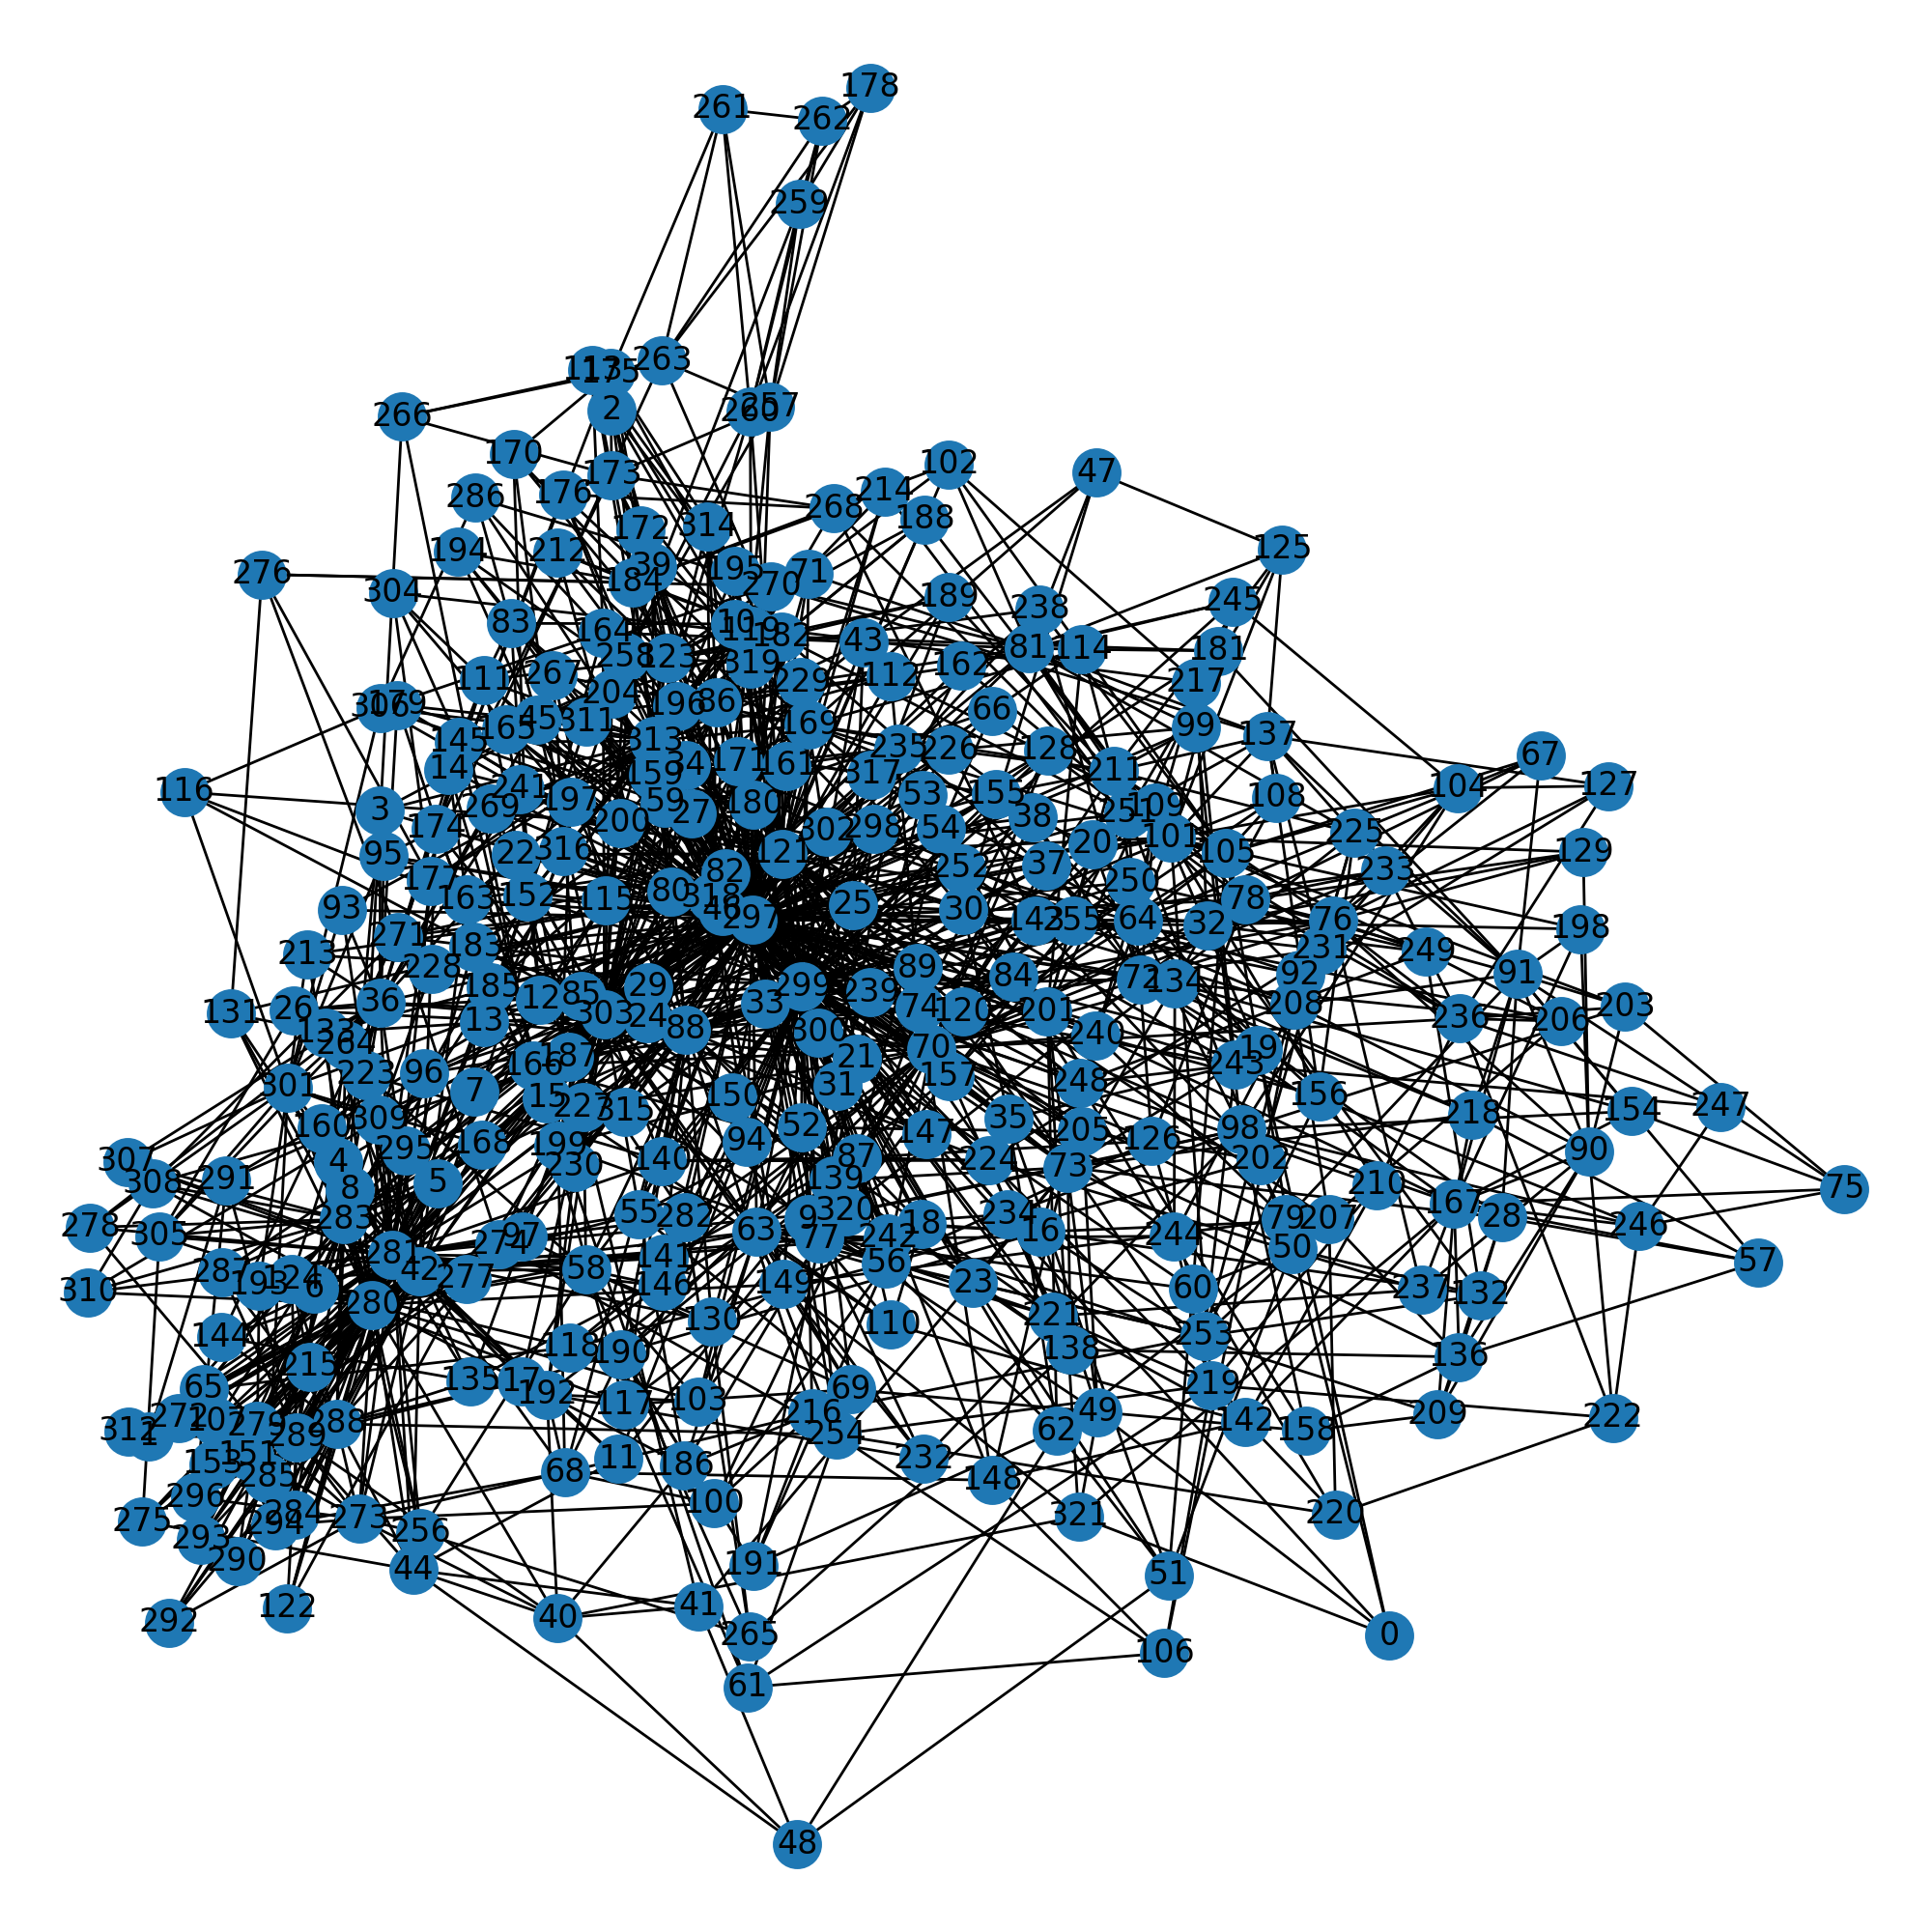

In [49]:
show_G(a_zwickau_G)

<IPython.core.display.Javascript object>


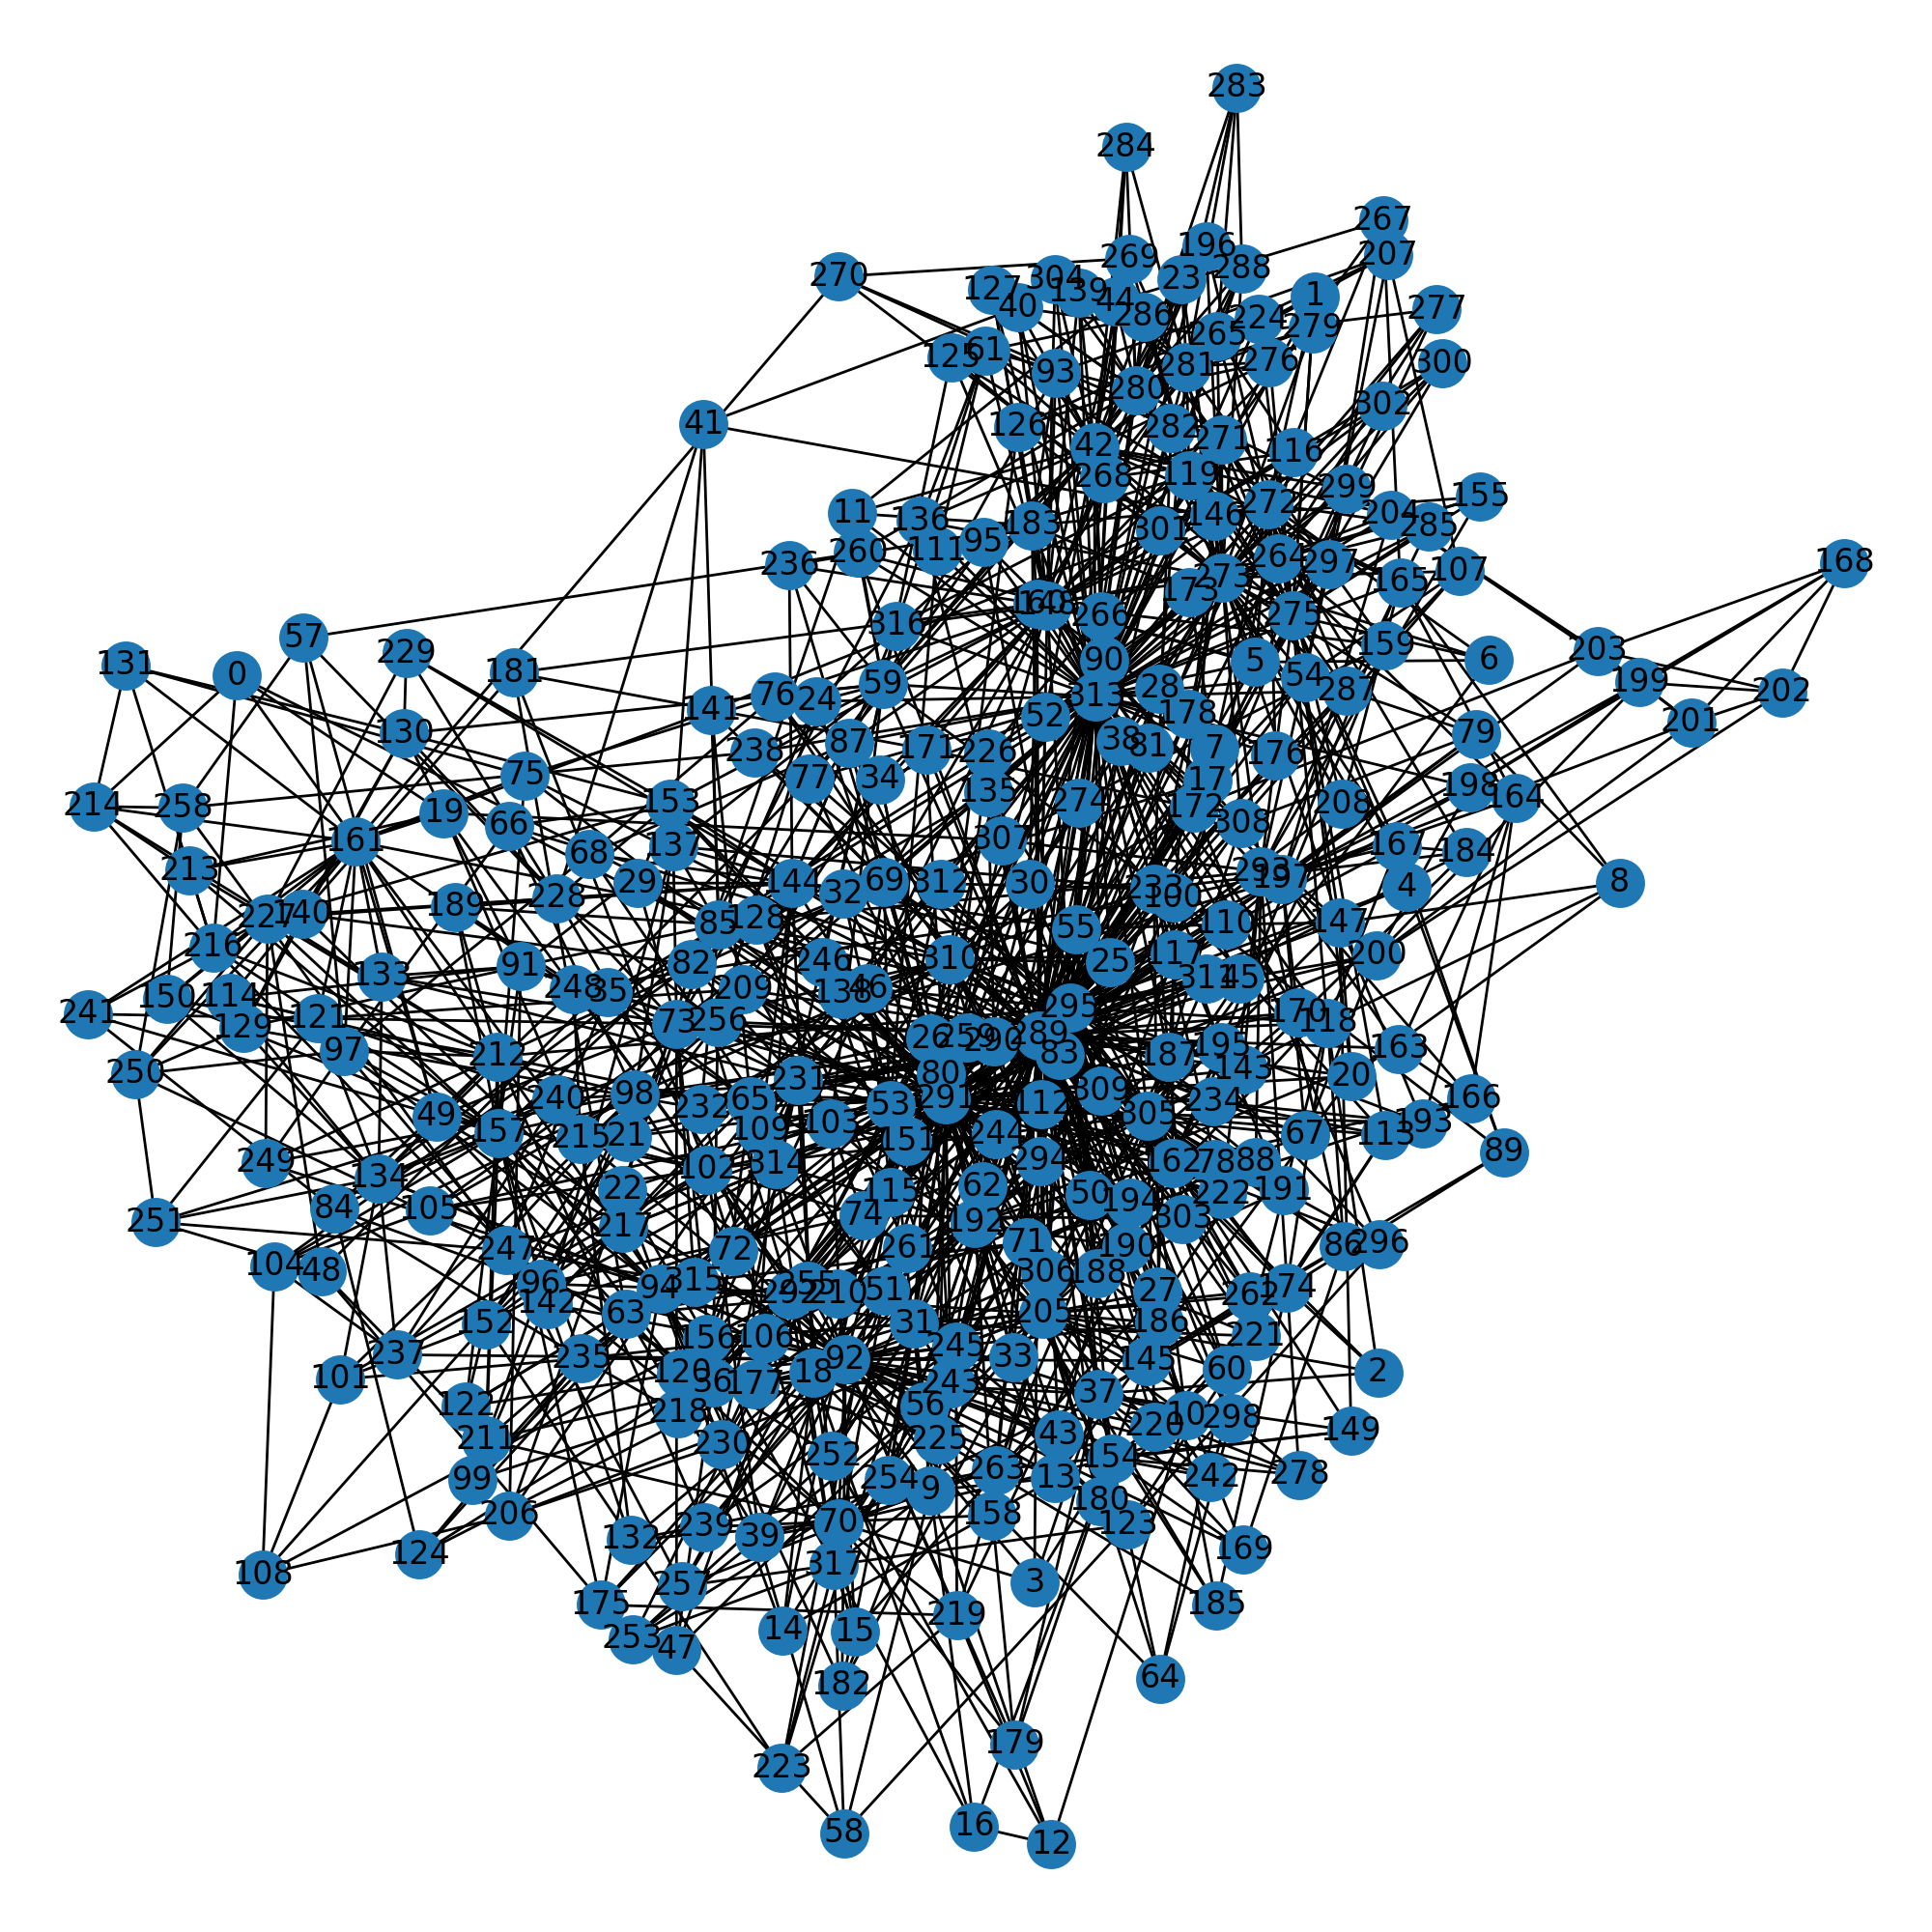

In [50]:
show_G(b_london_G)